In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.get_option("display.max_columns")
pd.get_option("display.max_rows")

In [ ]:
missing_values = ["n/a", "na", "--"]

In [ ]:

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-3/cleaned_dataset.csv', na_values = missing_values)


In [ ]:

raw = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-3/Combined COVID-19 Questionnaire data Marnewick August 2022.xlsx - COVID19 RAQ with Results.csv', na_values = missing_values)


In [ ]:
raw.head(3)

,Participant Number,Visit,Age of Participant,Temperature of Participant (°C),"Does the participant feel hot or cold? Is the participant sweating or shivering? When the participant touches their forehead, does it feel hot? Answer: Y/N",Does the participant have a cough that recently started? Answer: Y/N,Does the participant have a sore throat or pain when swallowing? Answer: Y/N,Does the participant experience recent headaches or body pains? Answer: Y/N,Does the participant experience breathlessness or dificulty breathing that has been noticed recently? Answer: Y/N,Has the participant noticed any recent changes in their ability to taste or smell? Answer: Y/N,Has the participant recently been in close contact with someone confirmed to be infected with COVID-19? Answer: Y/N,Please confirm that the information the participant shared is accurate to the best of their knowledge and that permission has been given to contact him/her if necessary.,"Has the participant ever had a positive COVID-19 PCR, antibody or antigen test? Answer: Y/N","If so, please provide the date.",Does the participant have any known COVID-19 comorbidities? Answer: Y/N,Has the participant been vaccinated against SARS-CoV-2? Answer: Y/N,"If not, does the participant intend to get vaccinated? Answer: Y/N",COVID-19 Screening Results,NOTE: Not all participants received a COVID screening test. The time when the Baseline sample and the Intervention sample was taken is on next sheet of this workbook.
0,1,Baseline,NaN,36.4,N,N,N,N,N,N,N,N,N,NaN,N,Y,NaN,negative,NaN
1,NaN,Intervention,59.0,36.5,N,N,N,N,N,NaN,N,Y,Y,Jun-21,N,Y,NaN,positive,NaN
2,2,Initial Screening,NaN,36.3,N,N,N,N,N,N,N,Y,N,NaN,N,Y,NaN,NaN,NaN


In [ ]:
L=list(raw['Visit'])

In [ ]:
L.count('Baseline')

329

In [ ]:
raw['Participant Number'].fillna(method='ffill',limit=3, inplace=True)

In [ ]:
raw.head(10)

,Participant Number,Visit,Age of Participant,Temperature of Participant (°C),"Does the participant feel hot or cold? Is the participant sweating or shivering? When the participant touches their forehead, does it feel hot? Answer: Y/N",Does the participant have a cough that recently started? Answer: Y/N,Does the participant have a sore throat or pain when swallowing? Answer: Y/N,Does the participant experience recent headaches or body pains? Answer: Y/N,Does the participant experience breathlessness or dificulty breathing that has been noticed recently? Answer: Y/N,Has the participant noticed any recent changes in their ability to taste or smell? Answer: Y/N,Has the participant recently been in close contact with someone confirmed to be infected with COVID-19? Answer: Y/N,Please confirm that the information the participant shared is accurate to the best of their knowledge and that permission has been given to contact him/her if necessary.,"Has the participant ever had a positive COVID-19 PCR, antibody or antigen test? Answer: Y/N","If so, please provide the date.",Does the participant have any known COVID-19 comorbidities? Answer: Y/N,Has the participant been vaccinated against SARS-CoV-2? Answer: Y/N,"If not, does the participant intend to get vaccinated? Answer: Y/N",COVID-19 Screening Results,NOTE: Not all participants received a COVID screening test. The time when the Baseline sample and the Intervention sample was taken is on next sheet of this workbook.
0,1,Baseline,NaN,36.4,N,N,N,N,N,N,N,N,N,NaN,N,Y,NaN,negative,NaN
1,1,Intervention,59.0,36.5,N,N,N,N,N,NaN,N,Y,Y,Jun-21,N,Y,NaN,positive,NaN
2,2,Initial Screening,NaN,36.3,N,N,N,N,N,N,N,Y,N,NaN,N,Y,NaN,NaN,NaN
3,2,Baseline,NaN,36,N,N,N,N,N,NaN,N,Y,N,NaN,N,Y,NaN,positive,NaN
4,2,Intervention,58.0,36.4,N,N,N,N,N,N,N,N,N,NaN,N,Y,NaN,NS=NR,NaN
5,8,Baseline,NaN,36.4,N,N,N,N,N,N,N,Y,Y,3-Aug-21,Y,Y,NaN,positive,NaN
6,8,Intervention,53.0,36.1,N,N,N,N,N,N,N,Y,N,NaN,Y,Y,NaN,negative,NaN
7,9,Initial Screening,NaN,36.3,N,N,N,N,N,N,N,Y,N,NaN,N,Y,NaN,NaN,NaN
8,9,Baseline,NaN,36.2,N,N,N,N,N,N,N,Y,N,NaN,N,Y,NaN,negative,NaN
9,9,Intervention,58.0,36.1,N,N,N,N,N,N,N,Y,N,NaN,N,Y,NaN,negative,NaN


In [ ]:
# df.columns[df.isnull().any()]


In [ ]:
L=[]
L_less=[]
for i in df.columns:
  if((df[i].isnull().sum())<(0.5*(df.shape[0]))):
    L.append(i)
  else:
    L_less.append(i)

In [ ]:
# These columns have more than 50% values
L_less

['Time since quit (yrs)',
 'Smoke selection',
 'No of smokes/day',
 'Red wine (No=1; Yes=2)',
 'White wine (No=1; Yes=2)',
 'Glasses per day (<2=1; >2=2)',
 'Glasses per week',
 'Beer (No=1; Yes=2)',
 'Glasses per day',
 'Glasses per week2',
 'Brandy',
 'Whiskey',
 'Rum',
 'Glasses per day3',
 'Glasses per week4',
 'If so, please provide the date._b',
 'If not, does the participant intend to get vaccinated? Answer: Y/N_b',
 'NOTE: Not all participants received a COVID screening test. The time when the Baseline sample and the Intervention sample was taken is on next sheet of this workbook._b',
 'If so, please provide the date._i',
 'If not, does the participant intend to get vaccinated? Answer: Y/N_i',
 'NOTE: Not all participants received a COVID screening test. The time when the Baseline sample and the Intervention sample was taken is on next sheet of this workbook._i']

In [ ]:
df=df[L]
df=df.iloc[:,1:]

In [ ]:
df.head()

,NUMBER,BP_Average,Weight,Height (m),Waist circumference,BMI_x,Glucose,Chol,HB,Gender (M=1; F=2)_x,Age,"First Lang (Afr=1, Eng=2, Xho=3)",Second Lang,Marital status,Occupation,Hazardous exposure,HLE,Smoking (No=1; Yes=2; prev=3),Physical activity (Yes=1; No=2),PA/week,PA level,HPT (No=1; Yes=2; Unsure=3),Low/high Blood sugar (No=1; Yes=2; Unsure=3),Fam hx CVD (No=1; Yes=2; Unsure=3),High Chol,Alcohol (No=1; Yes=2),Kidney problems (No=1; Yes=2),Liver problems,Screening date,Gender (M=1; F=2)_y,VISIT 2 (Baseline),VISIT 3 (intervention),BMI_y,Participant Number,Visit_b,Age of Participant_b,Temperature of Participant (°C)_b,"Does the participant feel hot or cold? Is the participant sweating or shivering? When the participant touches their forehead, does it feel hot? Answer: Y/N_b",Does the participant have a cough that recently started? Answer: Y/N_b,Does the participant have a sore throat or pain when swallowing? Answer: Y/N_b,Does the participant experience recent headaches or body pains? Answer: Y/N_b,Does the participant experience breathlessness or dificulty breathing that has been noticed recently? Answer: Y/N_b,Has the participant noticed any recent changes in their ability to taste or smell? Answer: Y/N_b,Has the participant recently been in close contact with someone confirmed to be infected with COVID-19? Answer: Y/N_b,Please confirm that the information the participant shared is accurate to the best of their knowledge and that permission has been given to contact him/her if necessary._b,"Has the participant ever had a positive COVID-19 PCR, antibody or antigen test? Answer: Y/N_b",Does the participant have any known COVID-19 comorbidities? Answer: Y/N_b,Has the participant been vaccinated against SARS-CoV-2? Answer: Y/N_b,COVID-19 Screening Results_b,Visit_i,Temperature of Participant (°C)_i,"Does the participant feel hot or cold? Is the participant sweating or shivering? When the participant touches their forehead, does it feel hot? Answer: Y/N_i",Does the participant have a cough that recently started? Answer: Y/N_i,Does the participant have a sore throat or pain when swallowing? Answer: Y/N_i,Does the participant experience recent headaches or body pains? Answer: Y/N_i,Does the participant experience breathlessness or dificulty breathing that has been noticed recently? Answer: Y/N_i,Has the participant noticed any recent changes in their ability to taste or smell? Answer: Y/N_i,Has the participant recently been in close contact with someone confirmed to be infected with COVID-19? Answer: Y/N_i,Please confirm that the information the participant shared is accurate to the best of their knowledge and that permission has been given to contact him/her if necessary._i,"Has the participant ever had a positive COVID-19 PCR, antibody or antigen test? Answer: Y/N_i",Does the participant have any known COVID-19 comorbidities? Answer: Y/N_i,Has the participant been vaccinated against SARS-CoV-2? Answer: Y/N_i,COVID-19 Screening Results_i
0,1,High Normal,63.1,1.67,85.0,22.63,3.5,High,16.3,2,57,2,1,3,Researcher Scientist,Yes,4,3.0,1,3.0,2.0,1,1,2,2.0,2,1,1,02/10/2019,2.0,22/11/2021,16/2/2022,22.6,1,Baseline,59.0,36.4,N,N,N,N,N,N,N,N,N,N,Y,negative,Intervention,36.5,N,N,N,N,N,NaN,N,Y,Y,N,Y,positive
1,2,High Normal,67.0,1.67,80.0,24.02,4.8,5.92,15.6,2,55,2,1,4,librarian,No,3,2.0,1,2.0,1.0,1,1,1,2.0,2,1,1,02-10-2019,2.0,24/11/2021,16/2/2022,24.0,2,Baseline,58.0,36,N,N,N,N,N,NaN,N,Y,N,N,Y,positive,Intervention,36.4,N,N,N,N,N,N,N,N,N,N,Y,NS=NR
2,8,High Normal,95.3,1.71,111.5,32.59,4.8,Hi,13.2,1,51,2,1,3,Assistant Libarian,No,3,3.0,2,NaN,NaN,2,1,2,2.0,2,1,1,02/10/2019,1.0,11/11/2021,31/1/2022,32.6,8,Baseline,53.0,36.4,N,N,N,N,N,N,N,Y,Y,Y,Y,positive,Intervention,36.1,N,N,N,N,N,N,N,Y,N,Y,Y,negative
3,9,Normal,54.0,1.57,68.0,21.91,3.8,5.63,9.3,2,56,2,1,3,Administrator,No,3,1.0,1,2.0,1.0,1,1,2,1.0,1,1,1,03-10-2019,2.0,12/11/2021,4/2/2022,21.9,9,Baseline,58.0,36.2,N,N,N,N,N,N,N,Y,N,N,Y,negative,Intervention,36.1,N,N,N,N,N,N,N,Y,N,N,Y,negativ

In [ ]:
df.iloc[:2,45:]

,"Has the participant ever had a positive COVID-19 PCR, antibody or antigen test? Answer: Y/N_b",Does the participant have any known COVID-19 comorbidities? Answer: Y/N_b,Has the participant been vaccinated against SARS-CoV-2? Answer: Y/N_b,COVID-19 Screening Results_b,Visit_i,Temperature of Participant (°C)_i,"Does the participant feel hot or cold? Is the participant sweating or shivering? When the participant touches their forehead, does it feel hot? Answer: Y/N_i",Does the participant have a cough that recently started? Answer: Y/N_i,Does the participant have a sore throat or pain when swallowing? Answer: Y/N_i,Does the participant experience recent headaches or body pains? Answer: Y/N_i,Does the participant experience breathlessness or dificulty breathing that has been noticed recently? Answer: Y/N_i,Has the participant noticed any recent changes in their ability to taste or smell? Answer: Y/N_i,Has the participant recently been in close contact with someone confirmed to be infected with COVID-19? Answer: Y/N_i,Please confirm that the information the participant shared is accurate to the best of their knowledge and that permission has been given to contact him/her if necessary._i,"Has the participant ever had a positive COVID-19 PCR, antibody or antigen test? Answer: Y/N_i",Does the participant have any known COVID-19 comorbidities? Answer: Y/N_i,Has the participant been vaccinated against SARS-CoV-2? Answer: Y/N_i,COVID-19 Screening Results_i
0,N,N,Y,negative,Intervention,36.5,N,N,N,N,N,NaN,N,Y,Y,N,Y,positive
1,N,N,Y,positive,Intervention,36.4,N,N,N,N,N,N,N,N,N,N,Y,NS=NR


In [ ]:
df.iloc[:2,45:].columns

Index(['Has the participant ever had a positive COVID-19 PCR, antibody or antigen test? Answer: Y/N_b',
       'Does the participant have any known COVID-19 comorbidities? Answer: Y/N_b',
       'Has the participant been vaccinated against SARS-CoV-2? Answer: Y/N_b',
       'COVID-19 Screening Results_b', 'Visit_i',
       'Temperature of Participant (°C)_i',
       'Does the participant feel hot or cold? Is the participant sweating or shivering? When the participant touches their forehead, does it feel hot? Answer: Y/N_i',
       'Does the participant have a cough that recently started? Answer: Y/N_i',
       'Does the participant have a sore throat or pain when swallowing? Answer: Y/N_i',
       'Does the participant experience recent headaches or body pains? Answer: Y/N_i',
       'Does the participant experience breathlessness or dificulty breathing that has been noticed recently? Answer: Y/N_i',
       'Has the participant noticed any recent changes in their ability to taste or sm

In [ ]:
def check_Obesity(s):
  if(s<18.5):
    return 'Under Weight'
  elif(s>=18.5 and s<25):
    return 'Normal'
  elif(s>=25 and s<30):
    return 'Overweight'
  elif(s>=30):
    return 'Obese'
  

In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [ ]:
numeric_data=df.select_dtypes(include=np.number)


In [ ]:
non_numeric=df.select_dtypes(include = ['object'])


In [ ]:
numeric_data.shape

(257, 23)

In [ ]:
non_numeric.shape

(257, 40)

In [ ]:
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(numeric_data)
imputed_numeric=np.round(imp.transform(numeric_data))
numeric_data=pd.DataFrame(imputed_numeric, columns=numeric_data.columns)

In [ ]:
non_numeric=non_numeric.fillna(method="pad", limit=2)
non_numeric=non_numeric.fillna(method="bfill", limit=22)

In [ ]:
non_numeric.columns[non_numeric.isnull().any()]


Index(['Does the participant feel hot or cold? Is the participant sweating or shivering? When the participant touches their forehead, does it feel hot? Answer: Y/N_b',
       'Does the participant have a cough that recently started? Answer: Y/N_b',
       'Does the participant have a sore throat or pain when swallowing? Answer: Y/N_b',
       'Does the participant experience recent headaches or body pains? Answer: Y/N_b',
       'Does the participant experience breathlessness or dificulty breathing that has been noticed recently? Answer: Y/N_b',
       'Has the participant noticed any recent changes in their ability to taste or smell? Answer: Y/N_b',
       'Has the participant recently been in close contact with someone confirmed to be infected with COVID-19? Answer: Y/N_b',
       'Please confirm that the information the participant shared is accurate to the best of their knowledge and that permission has been given to contact him/her if necessary._b',
       'Has the participant eve

One approach to imputing categorical features is to replace missing values with the most common class. You can do with by taking the index of the most common feature given in Pandas’ value_counts function.

### for each column, get value counts in decreasing order and take the index (value) of most common class


In [ ]:
non_numeric = non_numeric.apply(lambda x: x.fillna(x.value_counts().index[0]))


In [ ]:
non_numeric.columns[non_numeric.isnull().any()]


Index([], dtype='object')

In [ ]:
non_numeric.head()

,BP_Average,Glucose,Chol,"First Lang (Afr=1, Eng=2, Xho=3)",Second Lang,Marital status,Occupation,Hazardous exposure,Alcohol (No=1; Yes=2),Screening date,VISIT 2 (Baseline),VISIT 3 (intervention),Visit_b,Temperature of Participant (°C)_b,"Does the participant feel hot or cold? Is the participant sweating or shivering? When the participant touches their forehead, does it feel hot? Answer: Y/N_b",Does the participant have a cough that recently started? Answer: Y/N_b,Does the participant have a sore throat or pain when swallowing? Answer: Y/N_b,Does the participant experience recent headaches or body pains? Answer: Y/N_b,Does the participant experience breathlessness or dificulty breathing that has been noticed recently? Answer: Y/N_b,Has the participant noticed any recent changes in their ability to taste or smell? Answer: Y/N_b,Has the participant recently been in close contact with someone confirmed to be infected with COVID-19? Answer: Y/N_b,Please confirm that the information the participant shared is accurate to the best of their knowledge and that permission has been given to contact him/her if necessary._b,"Has the participant ever had a positive COVID-19 PCR, antibody or antigen test? Answer: Y/N_b",Does the participant have any known COVID-19 comorbidities? Answer: Y/N_b,Has the participant been vaccinated against SARS-CoV-2? Answer: Y/N_b,COVID-19 Screening Results_b,Visit_i,Temperature of Participant (°C)_i,"Does the participant feel hot or cold? Is the participant sweating or shivering? When the participant touches their forehead, does it feel hot? Answer: Y/N_i",Does the participant have a cough that recently started? Answer: Y/N_i,Does the participant have a sore throat or pain when swallowing? Answer: Y/N_i,Does the participant experience recent headaches or body pains? Answer: Y/N_i,Does the participant experience breathlessness or dificulty breathing that has been noticed recently? Answer: Y/N_i,Has the participant noticed any recent changes in their ability to taste or smell? Answer: Y/N_i,Has the participant recently been in close contact with someone confirmed to be infected with COVID-19? Answer: Y/N_i,Please confirm that the information the participant shared is accurate to the best of their knowledge and that permission has been given to contact him/her if necessary._i,"Has the participant ever had a positive COVID-19 PCR, antibody or antigen test? Answer: Y/N_i",Does the participant have any known COVID-19 comorbidities? Answer: Y/N_i,Has the participant been vaccinated against SARS-CoV-2? Answer: Y/N_i,COVID-19 Screening Results_i
0,High Normal,3.5,High,2,1,3,Researcher Scientist,Yes,2,02/10/2019,22/11/2021,16/2/2022,Baseline,36.4,N,N,N,N,N,N,N,N,N,N,Y,negative,Intervention,36.5,N,N,N,N,N,N,N,Y,Y,N,Y,positive
1,High Normal,4.8,5.92,2,1,4,librarian,No,2,02-10-2019,24/11/2021,16/2/2022,Baseline,36,N,N,N,N,N,N,N,Y,N,N,Y,positive,Intervention,36.4,N,N,N,N,N,N,N,N,N,N,Y,NS=NR
2,High Normal,4.8,Hi,2,1,3,Assistant Libarian,No,2,02/10/2019,11/11/2021,31/1/2022,Baseline,36.4,N,N,N,N,N,N,N,Y,Y,Y,Y,positive,Intervention,36.1,N,N,N,N,N,N,N,Y,N,Y,Y,negative
3,Normal,3.8,5.63,2,1,3,Administrator,No,1,03-10-2019,12/11/2021,4/2/2022,Baseline,36.2,N,N,N,N,N,N,N,Y,N,N,Y,negative,Intervention,36.1,N,N,N,N,N,N,N,Y,N,N,Y,negative
4,Normal,3.3,6.87,2,1,1,Student,No,2,03-10-2019,18/11/2021,11/2/2022,Baseline,36.8,N,N,N,N,N,N,N,Y,Y,N,Y,positive,Intervention,36.5,N,N,N,N,N,N,N,Y,Y,N,Y,negative


In [ ]:
cnames=list(non_numeric.select_dtypes(exclude=['object']).columns)


In [ ]:
import datetime


In [ ]:
non_numeric.drop('Screening date', axis=1, inplace=True)

In [ ]:
non_numeric.iloc[:,21].value_counts()

N    223
Y     34
Name: Has the participant ever had a positive COVID-19 PCR, antibody or antigen test? Answer: Y/N_b, dtype: int64

In [ ]:
# #Number of people with breakthrough infection

# L=[]
# who_are_these=[]
# for i in range(len(df)) :
#   if((non_numeric.iloc[i, 21]=='Y' and non_numeric.iloc[i, 23]=='Y' and non_numeric.iloc[i, 24] in ['positive', 'positive  *']) or 
#      (non_numeric.iloc[i, 35]=='Y' and non_numeric.iloc[i, 37]=='Y' and non_numeric.iloc[i, 38] in ['positive', 'positive  *']) or 
#      (non_numeric.iloc[i, 21]=='Y' and non_numeric.iloc[i, 24] in ['positive', 'positive  *']) or
#      (non_numeric.iloc[i, 35]=='Y' and non_numeric.iloc[i, 38] in ['positive', 'positive  *'])): 
#     #  (df.iloc[i, 48]=='Y' and df.iloc[i, 61]=='Y' and df.iloc[i, 62] in 'positive *'))
#     #  (df.iloc[i, 48]=='Y' and df.iloc[i, 61]=='Y' and df.iloc[i, 62] in 'positive *')):
#     L.append(non_numeric.iloc[i, 21])
#     who_are_these.append(df.iloc[i, 0])
# print('Number of people have tested postive before, Have been vaccinated, and tested positive again: {} \n'.format(len(L)))
# #Who are these person
# # for i in who_are_these:
# #   print('Who is this person: {} '.format(df.loc[df['NUMBER']==i]),'\n')
# # df.loc[who_are_these[0]]
# df.loc[df['NUMBER'].isin(who_are_these)]

How many people where involved on Baseline

In [ ]:
baseline=set()
for i in range(len(raw)) :
  if(raw.iloc[i, 1]=='Baseline'):
    baseline.add(raw.iloc[i, 0])

In [ ]:
len(baseline)

329

How many people where involved on Intevention


In [ ]:
intervention=set()
for i in range(len(raw)) :
  if(raw.iloc[i, 1]=='Intervention'):
    intervention.add(raw.iloc[i, 0])

In [ ]:
len(intervention)

319

In [ ]:
raw['Visit'].value_counts()

Baseline             329
Intervention         319
Initial Screening    305
Name: Visit, dtype: int64

Total of participants in the first data set

In [ ]:
len(set(raw['Participant Number']))

418

How many people participated in Both

In [ ]:
raw_2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-3/Combined COVID-19 Questionnaire data Marnewick August 2022.xlsx - Sheet1.csv', na_values = missing_values)


In [ ]:

raw_2.head()

,NUMBER,Screening date,Gender (M=1; F=2),VISIT 2 (Baseline),VISIT 3 (intervention),BMI
0,1,02/10/2019,2,22/11/2021,16/2/2022,22.6
1,2,02-10-2019,2,24/11/2021,16/2/2022,24.0
2,8,02/10/2019,1,11/11/2021,31/1/2022,32.6
3,9,03-10-2019,2,12/11/2021,4/2/2022,21.9
4,11,03-10-2019,2,18/11/2021,11/2/2022,32.8


In [ ]:
len(set(raw_2['NUMBER']))

257

How many people have breakthrough infection on baseline

In [ ]:
## People who have breakthrough infection at baseline
break_through_b=[]
for i in range(len(non_numeric)) :
  if((non_numeric.iloc[i, 23]=='Y' and non_numeric.iloc[i, 24] in ['positive', 'positive  *'])):
    break_through_b.append('Y')
  # if((non_numeric.iloc[i, 23]=='Y' and non_numeric.iloc[i, 24] in ['positive', 'positive  *']) and
    #  (non_numeric.iloc[i, 37]=='Y' and non_numeric.iloc[i, 38] in ['positive', 'positive  *'])):
  else:
    break_through_b.append('N')
# Total number of Re_infection after being vaccinated

In [ ]:
break_through_b.count('Y')

120

How many people have breakthrough infection on Intervention

In [ ]:
## People who have breakthrough infection at Intervention
break_through_i=[]
for i in range(len(non_numeric)) :
  if((non_numeric.iloc[i, 37]=='Y' and non_numeric.iloc[i, 38] in ['positive', 'positive  *'])):
    break_through_i.append('Y')
  # if((non_numeric.iloc[i, 23]=='Y' and non_numeric.iloc[i, 24] in ['positive', 'positive  *']) and
    #  (non_numeric.iloc[i, 37]=='Y' and non_numeric.iloc[i, 38] in ['positive', 'positive  *'])):
  else:
    break_through_i.append('N')
# Total number of Re_infection after being vaccinated

In [ ]:
break_through_i.count('Y')

63

How many people have breakthrough infection on Both

In [ ]:
## People who have breakthrough on both
break_through_both=[]
for i in range(len(non_numeric)) :
  if((non_numeric.iloc[i, 23]=='Y' and non_numeric.iloc[i, 24] in ['positive', 'positive  *']) and (non_numeric.iloc[i, 37]=='Y' and non_numeric.iloc[i, 38] in ['positive', 'positive  *'])):
    break_through_both.append('Y')
  # if((non_numeric.iloc[i, 23]=='Y' and non_numeric.iloc[i, 24] in ['positive', 'positive  *']) and
    #  (non_numeric.iloc[i, 37]=='Y' and non_numeric.iloc[i, 38] in ['positive', 'positive  *'])):
  else:
    break_through_both.append('N')
# Total number of Re_infection after being vaccinated

In [ ]:
break_through_both.count('Y')

42

In [ ]:
# ## People who have breakthrough infection and re-infection
# break_through=[]
# for i in range(len(df)) :
#   if((non_numeric.iloc[i, 23]=='Y' and non_numeric.iloc[i, 24] in ['positive', 'positive  *'])):
#     break_through.append('Y')
#   # if((non_numeric.iloc[i, 23]=='Y' and non_numeric.iloc[i, 24] in ['positive', 'positive  *']) and
#     #  (non_numeric.iloc[i, 37]=='Y' and non_numeric.iloc[i, 38] in ['positive', 'positive  *'])):
    
#   else:
#     break_through.append('N')
# # Total number of Re_infection after being vaccinated


In [ ]:
len(break_through_both)

257

In [ ]:
# re_infected=df.loc[df['NUMBER'].isin(who_are_these)]
# re_infected.loc[:,'BMI_x']
Weight_range=numeric_data['BMI_x'].apply(check_Obesity)
non_numeric.insert(6,column='Weight_Category', value=Weight_range)

In [ ]:
def occupation(s):
  if(s.lower() in "unemployed"):
    return 'unemployed'
  else:
    return 'employed'

In [ ]:
L=non_numeric['Occupation'].apply(occupation)

In [ ]:
non_numeric.drop('Occupation', axis=1, inplace=True)

In [ ]:
non_numeric.insert(7,column='Occupation', value=L)

In [ ]:
non_numeric['Occupation'].value_counts()

employed      193
unemployed     64
Name: Occupation, dtype: int64

In [ ]:
non_numeric['break_through']=break_through_both
non_numeric['break_through'].value_counts()


N    215
Y     42
Name: break_through, dtype: int64

In [ ]:
y=non_numeric['break_through']
non_numeric=non_numeric.drop('break_through', axis=1)
y.value_counts()

N    215
Y     42
Name: break_through, dtype: int64

In [ ]:
!pip install category_encoders



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 KB 7.9 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce


In [ ]:
# loo_encoder = ce.LeaveOneOutEncoder(cols=non_numeric.iloc[:,:], sigma=0.05)


In [ ]:
y,_=pd.factorize(y)

In [ ]:
# loo_encoder.fit(non_numeric, y)
# non_numeric_encoded = loo_encoder.transform(non_numeric)



In [ ]:
df['break_through']=y
y=df['break_through']

In [ ]:
y.value_counts()

0    215
1     42
Name: break_through, dtype: int64

In [ ]:
# X=pd.concat([numeric_data,non_numeric_encoded], axis=1)

In [ ]:
X=pd.concat([numeric_data,non_numeric], axis=1)

In [ ]:
X=X.iloc[:,1:]

In [ ]:
X.columns

Index(['Weight', 'Height (m)', 'Waist circumference', 'BMI_x', 'HB',
       'Gender (M=1; F=2)_x', 'Age', 'HLE', 'Smoking (No=1; Yes=2; prev=3)',
       'Physical activity (Yes=1; No=2)', 'PA/week', 'PA level',
       'HPT (No=1; Yes=2; Unsure=3)',
       'Low/high  Blood sugar (No=1; Yes=2; Unsure=3)',
       'Fam hx CVD (No=1; Yes=2; Unsure=3)', 'High Chol',
       'Kidney problems (No=1; Yes=2)', 'Liver problems',
       'Gender (M=1; F=2)_y', 'BMI_y', 'Participant Number',
       'Age of Participant_b', 'BP_Average', 'Glucose', 'Chol',
       'First Lang (Afr=1, Eng=2,  Xho=3)', 'Second Lang', 'Marital status',
       'Weight_Category', 'Occupation', 'Hazardous exposure',
       'Alcohol  (No=1; Yes=2)', 'VISIT 2 (Baseline)',
       'VISIT 3 (intervention)', 'Visit_b',
       'Temperature of Participant (°C)_b',
       'Does the participant feel hot or cold? Is the participant sweating or shivering? When the participant touches their forehead, does it feel hot? Answer: Y/N_b',
    

In [ ]:
features=list(X.columns)

In [ ]:
actual_names=['Weight','Height','Waist_circumference','BMI_x','HB','Gender(M=1,F=2)',
              'Age','HLE','Smoking','Physical_activity','PA/week','PA_level','HPT',
              'Low/high_Blood_sugar','Fam_hx_CVD','High_Chol','Kidney_problems',
              'Liver_problems','Gender','BMI_y','Participant_Number','Age of Participant_b',
              'BP','Glucose_Level','Chol','First_Lang','Second_Lang','Marital_status', 
              'Weight_Category','Occupation','Hazardous_exposure','Alcohol','VISIT_baseline','VISIT_Intervention',
              'Visit_b','Temp_b','Symp_Cold','Symp_Cough','Symp_Sore_throat','Symp_Headache',
              'breathlessness','taste_Smell','Close_to_Someonewith_Covid','IS_info_Accurate',
              'Positive_Before','COVID-19_comorbidities','Vaccinated_SARS-CoV-2',
              'COVID-19_Screening_Results_b','Visit_i','Temp_i',
              'Symp_Cold_i','Symp_Cough_i','Symp_Sore_throat_i','Symp_Headache_i',
              'breathlessness_i','taste_Smell_i','Close_to_Someonewith_Covid_i','IS_info_Accurate_i',
              'Positive_Before_i','COVID-19_comorbidities_i','Vaccinated_SARS-CoV-2_i',
              'COVID-19_Screening_Results_i']

In [ ]:
len(actual_names)

62

In [ ]:
X=np.array(X)

In [ ]:
X.shape

(257, 62)

In [ ]:
X=pd.DataFrame(X, columns=actual_names)

In [ ]:
X['BMI_y'].head()

0    23.0
1    24.0
2    33.0
3    22.0
4    33.0
Name: BMI_y, dtype: float64

In [ ]:
X.head(2)

,Weight,Height,Waist_circumference,BMI_x,HB,"Gender(M=1,F=2)",Age,HLE,Smoking,Physical_activity,PA/week,PA_level,HPT,Low/high_Blood_sugar,Fam_hx_CVD,High_Chol,Kidney_problems,Liver_problems,Gender,BMI_y,Participant_Number,Age of Participant_b,BP,Glucose_Level,Chol,First_Lang,Second_Lang,Marital_status,Weight_Category,Occupation,Hazardous_exposure,Alcohol,VISIT_baseline,VISIT_Intervention,Visit_b,Temp_b,Symp_Cold,Symp_Cough,Symp_Sore_throat,Symp_Headache,breathlessness,taste_Smell,Close_to_Someonewith_Covid,IS_info_Accurate,Positive_Before,COVID-19_comorbidities,Vaccinated_SARS-CoV-2,COVID-19_Screening_Results_b,Visit_i,Temp_i,Symp_Cold_i,Symp_Cough_i,Symp_Sore_throat_i,Symp_Headache_i,breathlessness_i,taste_Smell_i,Close_to_Someonewith_Covid_i,IS_info_Accurate_i,Positive_Before_i,COVID-19_comorbidities_i,Vaccinated_SARS-CoV-2_i,COVID-19_Screening_Results_i
0,63.0,2.0,85.0,23.0,16.0,2.0,57.0,4.0,3.0,1.0,3.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,23.0,1.0,59.0,High Normal,3.5,High,2,1,3,Normal,employed,Yes,2,22/11/2021,16/2/2022,Baseline,36.4,N,N,N,N,N,N,N,N,N,N,Y,negative,Intervention,36.5,N,N,N,N,N,N,N,Y,Y,N,Y,positive
1,67.0,2.0,80.0,24.0,16.0,2.0,55.0,3.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,24.0,2.0,58.0,High Normal,4.8,5.92,2,1,4,Normal,employed,No,2,24/11/2021,16/2/2022,Baseline,36,N,N,N,N,N,N,N,Y,N,N,Y,positive,Intervention,36.4,N,N,N,N,N,N,N,N,N,N,Y,NS=NR


In [ ]:
X['COVID-19_Screening_Results_b'].value_counts().index

Index(['positive', 'negative', 'NS=NR', 'inconclusive'], dtype='object')

In [ ]:
#BMI Average
def average_bmi(df):
  L=[]
  for i, rows in df.iterrows():
    x=rows['BMI_x']
    y=rows['BMI_y']
    z=((x+y)/2)
    L.append(z)
  return L

In [ ]:
X.insert(3, column='BMI', value=average_bmi(X))
X.drop(['BMI_x','BMI_y'], axis=1, inplace=True)

In [ ]:
#Temp Average
def average_temp(df):
  L=[]
  for i, rows in df.iterrows():
    x=rows['Temp_b']
    y=rows['Temp_i']
    z=((x+y)/2)
    L.append(z)
  return L

In [ ]:
X.insert(0, column='Temp', value=average_temp(X))
X.drop(['Temp_b','Temp_i'], axis=1, inplace=True)

In [ ]:
X.columns

Index(['Temp', 'Weight', 'Height', 'Waist_circumference', 'BMI', 'HB',
       'Gender(M=1,F=2)', 'Age', 'HLE', 'Smoking', 'Physical_activity',
       'PA/week', 'PA_level', 'HPT', 'Low/high_Blood_sugar', 'Fam_hx_CVD',
       'High_Chol', 'Kidney_problems', 'Liver_problems', 'Gender',
       'Participant_Number', 'Age of Participant_b', 'BP', 'Glucose_Level',
       'Chol', 'First_Lang', 'Second_Lang', 'Marital_status',
       'Weight_Category', 'Occupation', 'Hazardous_exposure', 'Alcohol',
       'VISIT_baseline', 'VISIT_Intervention', 'Visit_b', 'Symp_Cold',
       'Symp_Cough', 'Symp_Sore_throat', 'Symp_Headache', 'breathlessness',
       'taste_Smell', 'Close_to_Someonewith_Covid', 'IS_info_Accurate',
       'Positive_Before', 'COVID-19_comorbidities', 'Vaccinated_SARS-CoV-2',
       'COVID-19_Screening_Results_b', 'Visit_i', 'Symp_Cold_i',
       'Symp_Cough_i', 'Symp_Sore_throat_i', 'Symp_Headache_i',
       'breathlessness_i', 'taste_Smell_i', 'Close_to_Someonewith_Covid_i',
   

In [ ]:
X.drop(['Participant_Number','IS_info_Accurate_i','Second_Lang','First_Lang','IS_info_Accurate'], axis=1, inplace=True)

In [ ]:
data=pd.concat([X,y],axis=1)

In [ ]:
corr_matrix=data.corr()

In [ ]:
corr_matrix['break_through'].sort_values(ascending=False).head(20)

break_through                   1.000000
COVID-19_Screening_Results_i    0.735324
VISIT_Intervention              0.544790
VISIT_baseline                  0.540117
Chol                            0.482291
Temp                            0.415035
COVID-19_Screening_Results_b    0.400890
Glucose_Level                   0.363430
Vaccinated_SARS-CoV-2_i         0.203631
Vaccinated_SARS-CoV-2           0.184109
Symp_Cough                      0.147914
Symp_Cough_i                    0.147914
Symp_Cold_i                     0.147750
Liver_problems                  0.141408
breathlessness                  0.141408
Close_to_Someonewith_Covid      0.141408
BP                              0.136929
Marital_status                  0.101353
Kidney_problems                 0.080615
taste_Smell                     0.080615
Name: break_through, dtype: float64

In [ ]:
X.drop(['COVID-19_Screening_Results_b','COVID-19_Screening_Results_i','Vaccinated_SARS-CoV-2',
        'Vaccinated_SARS-CoV-2_i','VISIT_baseline','VISIT_Intervention'],axis=1, inplace=True)

In [ ]:

# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [ ]:
# fs = SelectKBest(score_func=f_regression, k=20)
# # apply feature selection
# X_selected = fs.fit_transform(X, y)
# print(X_selected.shape)

Using Filter Method, Using Information Gain

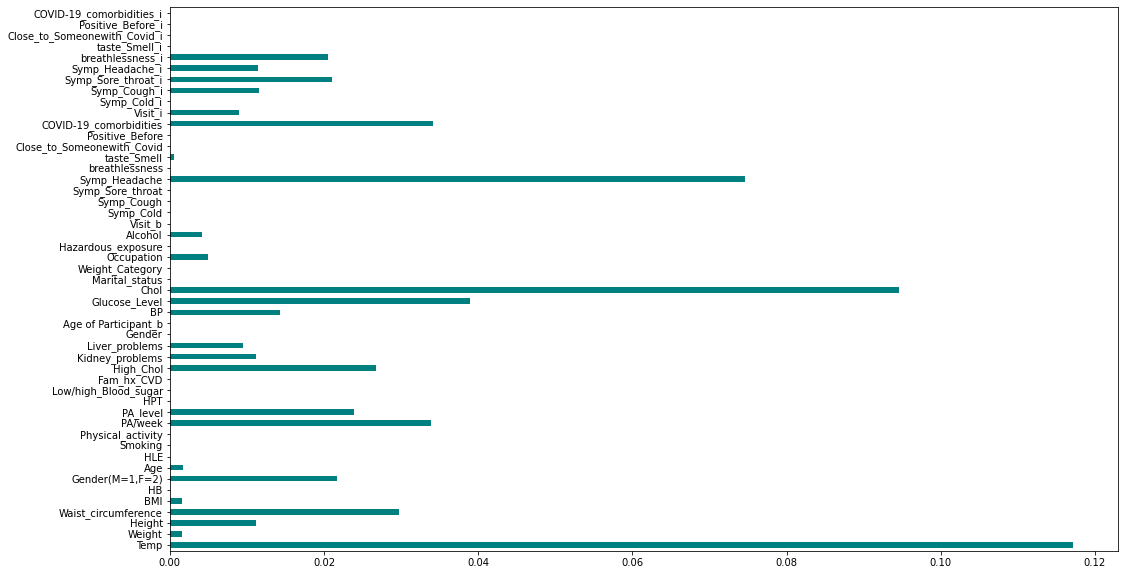

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline
importances=mutual_info_classif(X,y)
feature_importance=pd.Series(importances,X.columns[0:len(data.columns)-1])
feature_importance.plot(kind='barh', color='teal')
plt.gcf().set_size_inches(17,10)
plt.show()

In [ ]:
# feature_importance.sort_values(ascending=False).head(50)

In [ ]:
Picked_IG=feature_importance[feature_importance>0.01]

In [ ]:
len(Picked_IG)

17

CHi-Square Test

The Chi-square test is used for categorical features in a dataset. We calculate Chi-square between each feature and the target and select the desired number of features with the best Chi-square scores. In order to correctly apply the chi-squared in order to test the relation between various features in the dataset and the target variable, the following conditions have to be met: the variables have to be categorical, sampled independently and values should have an expected frequency greater than 5.

In [ ]:
from sklearn.feature_selection import chi2

In [ ]:
chi2_features=SelectKBest(chi2,k=30)
picked_CHI=chi2_features.fit_transform(X,y)

In [ ]:
picked_CHI.shape

(257, 30)

Correlation

In [ ]:
import seaborn as sns

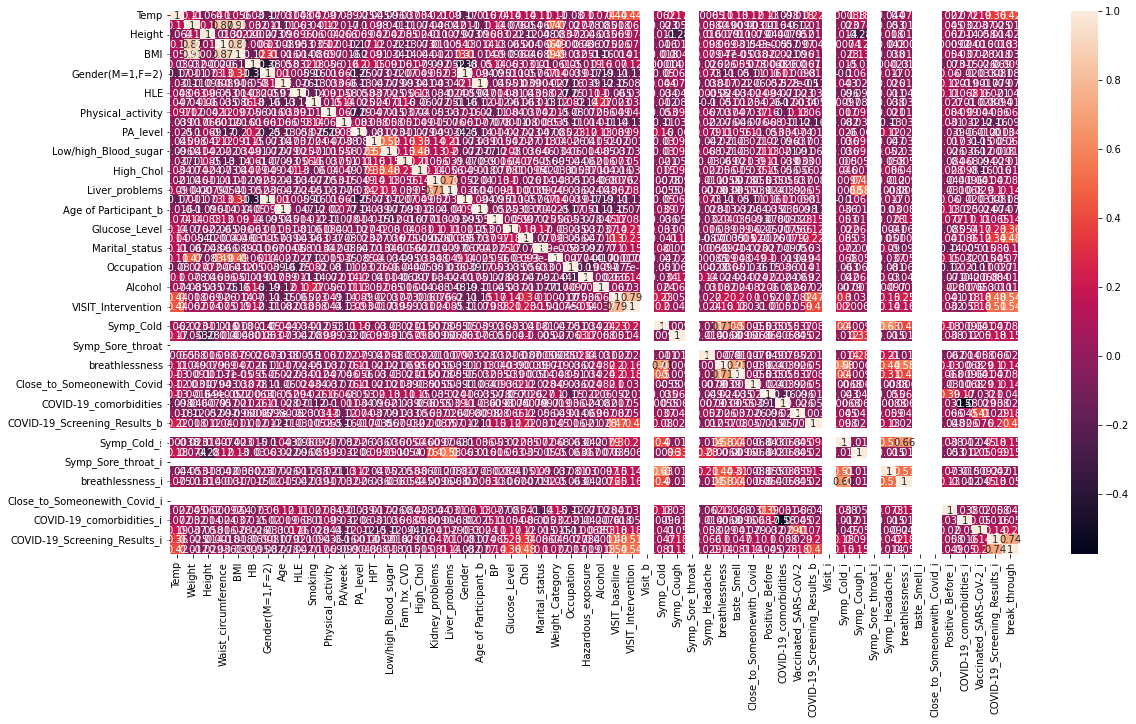

In [ ]:
plt.figure(figsize=(19,10))
sns.heatmap(corr_matrix,annot=True)

In [ ]:
picked_Corr=corr_matrix['break_through'].sort_values(ascending=False)

In [ ]:
picked_Corr=picked_Corr[picked_Corr>abs(0.050)]

In [ ]:
len(picked_Corr)

24

In [ ]:
picked_Features_Corr=picked_Corr.index

In [ ]:
picked_Features_Corr

Index(['break_through', 'COVID-19_Screening_Results_i', 'VISIT_Intervention',
       'VISIT_baseline', 'Chol', 'Temp', 'COVID-19_Screening_Results_b',
       'Glucose_Level', 'Vaccinated_SARS-CoV-2_i', 'Vaccinated_SARS-CoV-2',
       'Symp_Cough', 'Symp_Cough_i', 'Symp_Cold_i', 'Liver_problems',
       'breathlessness', 'Close_to_Someonewith_Covid', 'BP', 'Marital_status',
       'Kidney_problems', 'taste_Smell', 'Symp_Cold', 'Weight_Category',
       'Physical_activity', 'HPT'],
      dtype='object')

In [ ]:
Picked_IG.index

Index(['Temp', 'Height', 'Waist_circumference', 'Gender(M=1,F=2)', 'PA/week',
       'PA_level', 'High_Chol', 'Kidney_problems', 'BP', 'Glucose_Level',
       'Chol', 'Symp_Headache', 'COVID-19_comorbidities', 'Symp_Cough_i',
       'Symp_Sore_throat_i', 'Symp_Headache_i', 'breathlessness_i'],
      dtype='object')

In [ ]:
L=list(picked_Features_Corr)

In [ ]:
X_Corr=data[L]

In [ ]:
X_Corr.drop(['break_through','COVID-19_Screening_Results_b','COVID-19_Screening_Results_i','Vaccinated_SARS-CoV-2',
        'Vaccinated_SARS-CoV-2_i','VISIT_baseline','VISIT_Intervention'],axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
scaled=StandardScaler().fit_transform(X_Corr)
X_Corr=pd.DataFrame(scaled, columns=X_Corr.columns)

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X_Corr,y,random_state=42,stratify=y)

In [ ]:
Ytrain.value_counts()

0    161
1     31
Name: break_through, dtype: int64

### Training an MLP with Stratified Kfold with gridsearch and without SMOTE

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
batch_size = 10
num_classes = 1
epochs = 100
import pickle

In [ ]:
from scipy.stats import loguniform
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
!pip install tensorflow scikeras scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

# Use scikit-learn to grid search the batch size and epochs
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
from sklearn.metrics import matthews_corrcoef
from imblearn.metrics import geometric_mean_score
# Function to create model, required for Keras

In [ ]:
cv = StratifiedKFold(n_splits=3)


In [ ]:
def create_model(dropout_rate, weight_constraint,neurons,activation):
	# create modeloptimizer=optimizer 
  model = Sequential()
  model.add(Dense((X_Corr.shape[1])+neurons, activation=activation, input_dim=(X_Corr.shape[1]), kernel_constraint=MaxNorm(weight_constraint)))
  model.add(Dropout(dropout_rate))
  model.add(Dense((X_Corr.shape[1])+neurons, activation=activation))
  model.add(Dense(num_classes, activation='sigmoid'))
	# Compile model
  model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
  return model
seed = 7
tf.random.set_seed(seed)
# create model
model = KerasClassifier(model=create_model, epochs=epochs, batch_size=batch_size, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'Adam', 'RMSProp']
activation = ['relu']
weight_constraint = [3.0, 5.0]
dropout_rate = [0.3, 0.5]
neurons = [20]
param_grid = dict(model__dropout_rate=dropout_rate, model__weight_constraint=weight_constraint,
                  model__neurons=neurons,model__activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv)
grid.fit(Xtrain, Ytrain)
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))

Best: 0.906250 using {'model__activation': 'relu', 'model__dropout_rate': 0.3, 'model__neurons': 20, 'model__weight_constraint': 3.0}


In [ ]:

filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-3/models/corr/mlp/MLP_Correlation_with_Cross-Validation_without_SMOTE.sav'
pickle.dump(grid, open(filename, 'wb')) 

In [ ]:
# loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-3/models/corr/mlp/MLP_Correlation_with_Cross-Validation_without_SMOTE.sav', 'rb'))
y_pred = grid.predict(Xtest)
fpr_mlp_1, tpr_mlp_1, _ = metrics.roc_curve(Ytest, y_pred)
auc_mlp_1 = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(grid.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.88      0.93      0.90        54
           1       0.50      0.36      0.42        11

    accuracy                           0.83        65
   macro avg       0.69      0.64      0.66        65
weighted avg       0.81      0.83      0.82        65



In [ ]:
auc_mlp_1

0.6448

In [ ]:
print('The geometric mean is: {}'.format(geometric_mean_score(Ytest, y_pred)))
print('The Matthews correlation coefficient is: {}'.format(matthews_corrcoef(Ytest, y_pred)))

The geometric mean is: 0.5802588531856595
The Matthews correlation coefficient is: 0.3304857994026801


## XGBoost without SMOTE

In [ ]:
# full_boost=xgb.XGBClassifier(learning_rate =0.1,
#  n_estimators=1000,
#  max_depth=5,
#  min_child_weight=1,
#  gamma=0,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  objective= 'binary:logistic',
#  nthread=4,
#  scale_pos_weight=1,
#  seed=27)
# full_boost.fit(Xtrain, Ytrain)
# y_pred=full_boost.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-3/models/corr/xgb/XGB_Correlation_with_Cross-Validation_without_SMOTE.sav' 
# pickle.dump(full_boost, open(filename, 'wb')) 
loadedmodel = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-3/models/corr/xgb/XGB_Correlation_with_Cross-Validation_without_SMOTE.sav', 'rb'))
y_pred = loadedmodel.predict(Xtest)
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(Ytest, y_pred)
auc_xgb = round(metrics.roc_auc_score(Ytest, y_pred), 4)
print("AUC:",auc_xgb)
y_pred=np.round(loadedmodel.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))
XGBoost_Multivariate_imputed_Non_PCA_Non_Cross_AUC=metrics.roc_auc_score(Ytest, y_pred)

AUC: 0.7357

CR by library method=
               precision    recall  f1-score   support

           0       0.91      0.93      0.92        54
           1       0.60      0.55      0.57        11

    accuracy                           0.86        65
   macro avg       0.75      0.74      0.74        65
weighted avg       0.86      0.86      0.86        65



In [ ]:
XGBoost_Multivariate_imputed_Non_PCA_Non_Cross_AUC

0.7356902356902357

In [ ]:
print('The geometric mean is: {}'.format(geometric_mean_score(Ytest, y_pred)))
print('The Matthews correlation coefficient is: {}'.format(matthews_corrcoef(Ytest, y_pred)))

The geometric mean is: 0.7106690545187014
The Matthews correlation coefficient is: 0.4898729556760461


### Training an MLP with Kfold and with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
Xtrain, Ytrain = oversample.fit_resample(Xtrain, Ytrain)

In [ ]:
Ytrain.value_counts()

0    161
1    161
Name: break_through, dtype: int64

In [ ]:
X_Corr.shape[1]

17

In [ ]:
from tensorflow import keras
from tensorflow.keras import optimizers

MLP Training

In [ ]:
def create_model(dropout_rate, weight_constraint,neurons,activation):
	# create modeloptimizer=optimizer 
  model = Sequential()
  model.add(Dense((X_Corr.shape[1])+neurons, activation=activation, input_dim=(X_Corr.shape[1]), kernel_constraint=MaxNorm(weight_constraint)))
  model.add(Dropout(dropout_rate))
  model.add(Dense((X_Corr.shape[1])+neurons, activation=activation))
  model.add(Dense(num_classes, activation='sigmoid'))
	# Compile model
  model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(decay=1e-6), metrics=['accuracy'])
  return model
seed = 7
tf.random.set_seed(seed)
# create model
model = KerasClassifier(model=create_model, epochs=epochs, batch_size=batch_size, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adam']
activation = ['relu']
weight_constraint = [3.0, 5.0]
dropout_rate = [0.3, 0.5]
neurons = [20]
param_grid = dict(model__dropout_rate=dropout_rate, model__weight_constraint=weight_constraint,
                  model__neurons=neurons,model__activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv)
grid.fit(Xtrain, Ytrain)
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))

Best: 0.950415 using {'model__activation': 'relu', 'model__dropout_rate': 0.3, 'model__neurons': 20, 'model__weight_constraint': 3.0}


In [ ]:

filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-3/models/corr/mlp/MLP_Correlation_with_Cross-Validation_with_SMOTE.hdf5'
pickle.dump(grid, open(filename, 'wb')) 

In [ ]:
# loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-3/models/corr/mlp/MLP_Correlation_with_Cross-Validation_with_SMOTE.hdf5', 'rb'))
y_pred = grid.predict(Xtest)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(Ytest, y_pred)
auc_mlp = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
auc_mlp

0.7172

In [ ]:
y_pred=np.round(grid.predict(Xtest).ravel())
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.91      0.89      0.90        54
           1       0.50      0.55      0.52        11

    accuracy                           0.83        65
   macro avg       0.70      0.72      0.71        65
weighted avg       0.84      0.83      0.83        65



In [ ]:
MLP_Multivariate_imputed_PCA_Cross_Validation_AUC=metrics.roc_auc_score(Ytest, y_pred)

In [ ]:
MLP_Multivariate_imputed_PCA_Cross_Validation_AUC

0.7171717171717171

In [ ]:
print('The geometric mean is: {}'.format(geometric_mean_score(Ytest, y_pred)))
print('The Matthews correlation coefficient is: {}'.format(matthews_corrcoef(Ytest, y_pred)))

The geometric mean is: 0.6963106238227913
The Matthews correlation coefficient is: 0.41975697907115295


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 29.8 MB/s 


In [ ]:
import shap

In [ ]:
explain = shap.KernelExplainer(grid.predict, Xtrain)
shap_values = explain.shap_values(Xtest, nsamples=500)

  0%|          | 0/65 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

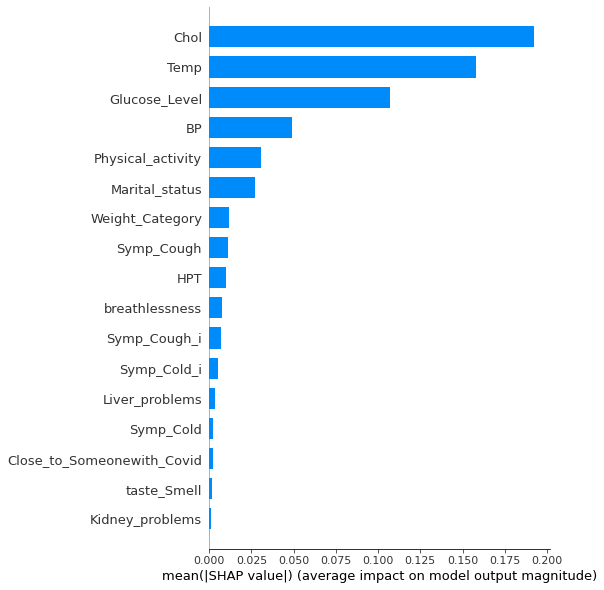

In [ ]:
shap.summary_plot(shap_values, plot_type = 'bar', feature_names = Xtest.columns)

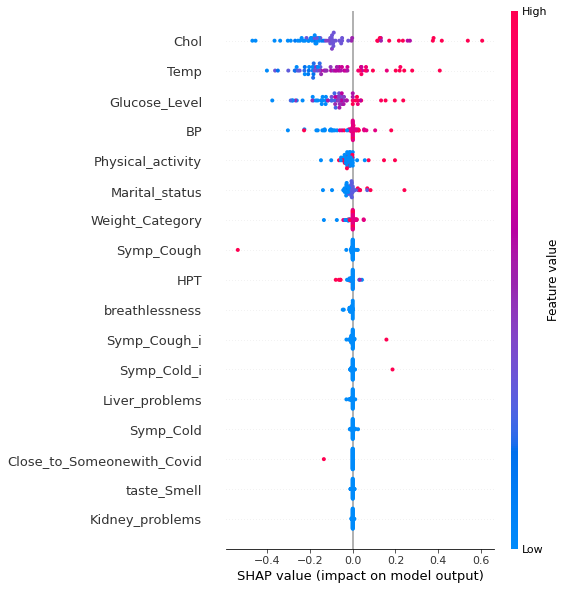

In [ ]:
shap.summary_plot(shap_values, Xtest)


In [ ]:
full_boost=xgb.XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
full_boost.fit(Xtrain, Ytrain)
y_pred=full_boost.predict(Xtest)
print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")
filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-3/models/corr/xgb/XGB_Correlation_with_Cross-Validation.sav' 
pickle.dump(full_boost, open(filename, 'wb')) 
loadedmodel = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-3/models/corr/xgb/XGB_Correlation_with_Cross-Validation.sav', 'rb'))
y_pred = loadedmodel.predict(Xtest)
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(Ytest, y_pred)
auc_xgb = round(metrics.roc_auc_score(Ytest, y_pred), 4)
print("AUC:",auc_xgb)
y_pred=np.round(loadedmodel.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))
XGBoost_Multivariate_imputed_Non_PCA_Non_Cross_AUC=metrics.roc_auc_score(Ytest, y_pred)

The accuracy is 84.62 %
AUC: 0.7264

CR by library method=
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        54
           1       0.55      0.55      0.55        11

    accuracy                           0.85        65
   macro avg       0.73      0.73      0.73        65
weighted avg       0.85      0.85      0.85        65



Training an XGBOOST

In [ ]:
full_boost=xgb.XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
full_boost.fit(Xtrain, Ytrain)
y_pred=full_boost.predict(Xtest)
print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")


The accuracy is 84.62 %


In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-3/models/corr/xgb/XGB_Correlation_with_Cross-Validation_with_SMOTE.sav' 
pickle.dump(full_boost, open(filename, 'wb')) 


In [ ]:
loadedmodel = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-3/models/corr/xgb/XGB_Correlation_with_Cross-Validation_with_SMOTE.sav', 'rb'))
y_pred = loadedmodel.predict(Xtest)
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(Ytest, y_pred)
auc_xgb = round(metrics.roc_auc_score(Ytest, y_pred), 4)


In [ ]:
auc_xgb

0.7264

In [ ]:
y_pred=np.round(loadedmodel.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        54
           1       0.55      0.55      0.55        11

    accuracy                           0.85        65
   macro avg       0.73      0.73      0.73        65
weighted avg       0.85      0.85      0.85        65



In [ ]:
XGBoost_Multivariate_imputed_Non_PCA_Non_Cross_AUC=metrics.roc_auc_score(Ytest, y_pred)

In [ ]:
print('The geometric mean is: {}'.format(geometric_mean_score(Ytest, y_pred)))
print('The Matthews correlation coefficient is: {}'.format(matthews_corrcoef(Ytest, y_pred)))

The geometric mean is: 0.7035264706814485
The Matthews correlation coefficient is: 0.45286195286195285


In [ ]:
explainer = shap.TreeExplainer(loadedmodel,Xtrain)
shap_values = explainer(Xtest)


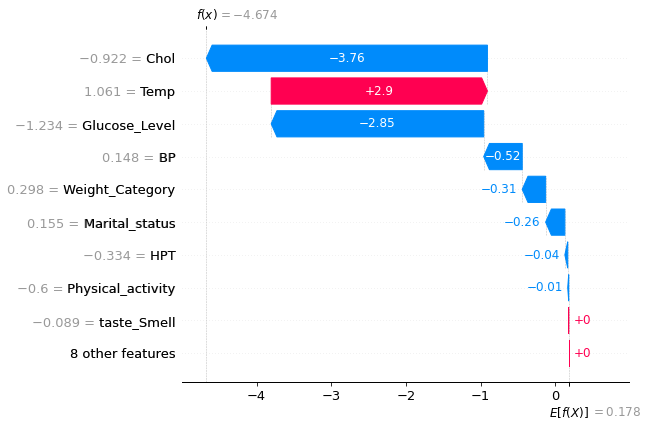

In [ ]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

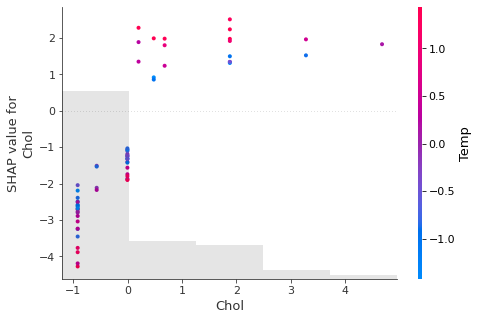

In [ ]:
shap.plots.scatter(shap_values[:,"Chol"], color=shap_values)


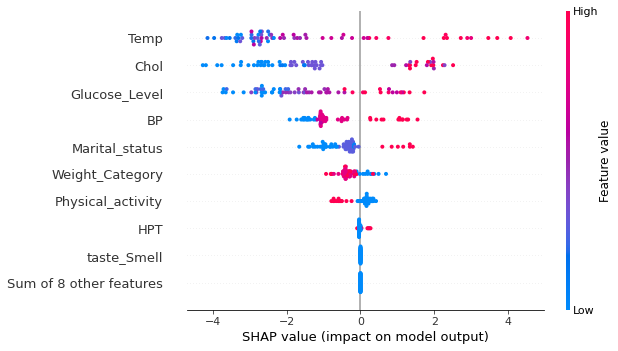

In [ ]:
shap.plots.beeswarm(shap_values)


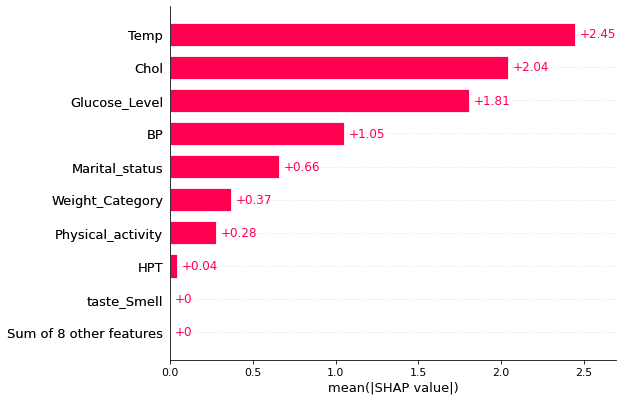

In [ ]:
shap.plots.bar(shap_values)


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


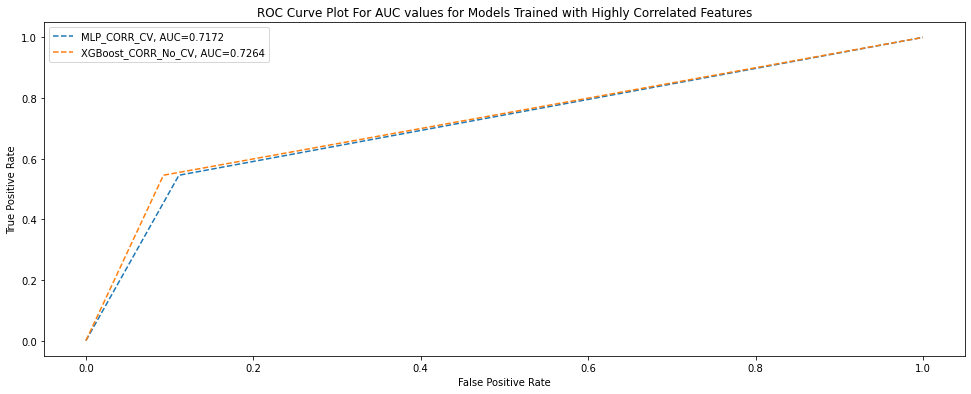

In [ ]:
plt.gcf().set_size_inches(16.5, 13.5)
plt.subplot(211)
plt.plot(fpr_mlp,tpr_mlp,linestyle='--',label="MLP_CORR_CV, AUC="+str(auc_mlp))
plt.subplot(211)
plt.plot(fpr_xgb,tpr_xgb,linestyle='--',label="XGBoost_CORR_No_CV, AUC="+str(auc_xgb))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve Plot For AUC values for Models Trained with Highly Correlated Features")
plt.legend()

## Training Models WITH All Features


In [ ]:
y.shape

(257,)

In [ ]:
scaled=StandardScaler().fit_transform(X)
X_full=pd.DataFrame(scaled, columns=X.columns)

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X_full,y,random_state=42,stratify=y)

In [ ]:
Xtrain.shape

(192, 49)

In [ ]:
Xtest.shape


(65, 49)

In [ ]:
Ytrain.value_counts()

0    161
1     31
Name: break_through, dtype: int64

### Training an MLP with Stratified Kfold with gridsearch and without SMOTE

In [ ]:
def create_model(dropout_rate, weight_constraint, optimizer,neurons,activation):
	# create modeloptimizer=optimizer 
  model = Sequential()
  model.add(Dense((Xtrain.shape[1])+neurons, activation=activation, input_dim=(Xtrain.shape[1]), kernel_constraint=MaxNorm(weight_constraint)))
  model.add(Dropout(dropout_rate))
  model.add(Dense((Xtrain.shape[1])+neurons, activation=activation))
  model.add(Dense(num_classes, activation='sigmoid'))
	# Compile model
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model
seed = 7
tf.random.set_seed(seed)
# create model
model = KerasClassifier(model=create_model, epochs=epochs, batch_size=batch_size, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adam']
activation = [ 'relu', 'tanh']
weight_constraint = [3.0, 5.0]
dropout_rate = [0.0, 0.3, 0.5]
neurons = [1, 20]
param_grid = dict(model__dropout_rate=dropout_rate, model__weight_constraint=weight_constraint,model__optimizer=optimizer,
                  model__neurons=neurons,model__activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv)
grid.fit(Xtrain, Ytrain)
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))

Best: 0.890625 using {'model__activation': 'tanh', 'model__dropout_rate': 0.5, 'model__neurons': 20, 'model__optimizer': 'SGD', 'model__weight_constraint': 3.0}


In [ ]:
# def create_model(dropout_rate, weight_constraint,optimizer='adam'):
# 	# create model
#   model = Sequential()
#   model.add(Dense((Xtrain.shape[1])+2, activation='relu', input_dim=(Xtrain.shape[1]), kernel_constraint=MaxNorm(weight_constraint)))
#   model.add(Dropout(dropout_rate))
#   model.add(Dense((Xtrain.shape[1])+4, activation='relu'))
#   model.add(Dense(num_classes, activation='sigmoid'))
# 	# Compile model
#   model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
#   return model
# seed = 7
# tf.random.set_seed(seed)
# # create model
# model = KerasClassifier(model=create_model, epochs=epochs, batch_size=batch_size, verbose=0)
# # define the grid search parameters
# # optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
# weight_constraint = [3.0, 4.0, 5.0]
# dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
# param_grid = dict(model__dropout_rate=dropout_rate, model__weight_constraint=weight_constraint)
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv)
# grid.fit(Xtrain, Ytrain)
# print("Best: %f using %s" % (grid.best_score_, grid.best_params_))

In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-3/models/non_corr/mlp/MLP_Correlation_with_SK_Cross-Validation_without_SMOTE.sav'
pickle.dump(grid, open(filename, 'wb')) 

In [ ]:
# loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-3/models/non_corr/mlp/MLP_Correlation_with_SK_Cross-Validation_without_SMOTE.sav', 'rb'))
y_pred = grid.predict(Xtest)
fpr_mlp_1, tpr_mlp_1, _ = metrics.roc_curve(Ytest, y_pred)
auc_mlp_1 = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
auc_mlp_1

0.5993

In [ ]:
y_pred=np.round(grid.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.86      0.93      0.89        54
           1       0.43      0.27      0.33        11

    accuracy                           0.82        65
   macro avg       0.65      0.60      0.61        65
weighted avg       0.79      0.82      0.80        65



In [ ]:
print('The geometric mean is: {}'.format(geometric_mean_score(Ytest, y_pred)))
print('The Matthews correlation coefficient is: {}'.format(matthews_corrcoef(Ytest, y_pred)))

The geometric mean is: 0.502518907629606
The Matthews correlation coefficient is: 0.24028450624944692


In [ ]:
full_boost=xgb.XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
full_boost.fit(Xtrain, Ytrain)
y_pred=full_boost.predict(Xtest)
print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")
filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-3/models/non_corr/xgb/XGB_Correlation_with_Cross-Validation_no_SMOTE.sav' 
pickle.dump(full_boost, open(filename, 'wb')) 
loadedmodel = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-3/models/non_corr/xgb/XGB_Correlation_with_Cross-Validation_no_SMOTE.sav', 'rb'))
y_pred = loadedmodel.predict(Xtest)
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(Ytest, y_pred)
auc_xgb = round(metrics.roc_auc_score(Ytest, y_pred), 4)
print("AUC:",auc_xgb)
y_pred=np.round(loadedmodel.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))
XGBoost_Multivariate_imputed_Non_PCA_Non_Cross_AUC=metrics.roc_auc_score(Ytest, y_pred)

The accuracy is 84.62 %
AUC: 0.6902

CR by library method=
               precision    recall  f1-score   support

           0       0.89      0.93      0.91        54
           1       0.56      0.45      0.50        11

    accuracy                           0.85        65
   macro avg       0.72      0.69      0.70        65
weighted avg       0.84      0.85      0.84        65



In [ ]:
print('The geometric mean is: {}'.format(geometric_mean_score(Ytest, y_pred)))
print('The Matthews correlation coefficient is: {}'.format(matthews_corrcoef(Ytest, y_pred)))

The geometric mean is: 0.6487491201346025
The Matthews correlation coefficient is: 0.4130474529469661


### Training an MLP with Kfold and with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
Xtrain, Ytrain = oversample.fit_resample(Xtrain, Ytrain)

In [ ]:
Xtrain.shape

(322, 49)

In [ ]:
Ytrain.value_counts()

0    161
1    161
Name: break_through, dtype: int64

In [ ]:
Xtrain.shape[1]

49

In [ ]:
def create_model(dropout_rate, weight_constraint,neurons,activation):
	# create modeloptimizer=optimizer 
  model = Sequential()
  model.add(Dense((Xtrain.shape[1])+neurons, activation=activation, input_dim=(Xtrain.shape[1]), kernel_constraint=MaxNorm(weight_constraint)))
  model.add(Dropout(dropout_rate))
  model.add(Dense((Xtrain.shape[1])+neurons, activation=activation))
  model.add(Dense(num_classes, activation='sigmoid'))
	# Compile model
  model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(decay=1e-6), metrics=['accuracy'])
  return model
seed = 7
tf.random.set_seed(seed)
# create model
model = KerasClassifier(model=create_model, epochs=epochs, batch_size=batch_size, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adam']
activation = ['relu']
weight_constraint = [3.0, 5.0]
dropout_rate = [0.3, 0.5]
neurons = [20]
param_grid = dict(model__dropout_rate=dropout_rate, model__weight_constraint=weight_constraint,
                  model__neurons=neurons,model__activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv)
grid.fit(Xtrain, Ytrain)
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.


Best: 0.987568 using {'model__activation': 'relu', 'model__dropout_rate': 0.5, 'model__neurons': 20, 'model__weight_constraint': 5.0}


In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-3/models/non_corr/mlp/MLP_Correlation_with_Cross-Validation_with_SMOTE.sav'
pickle.dump(grid, open(filename, 'wb')) 

In [ ]:
# loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-3/models/non_corr/mlp/MLP_Correlation_with_Cross-Validation_with_SMOTE.sav', 'rb'))
y_pred = grid.predict(Xtest)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(Ytest, y_pred)
auc_mlp = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
auc_mlp

0.6448

In [ ]:
y_pred=np.round(grid.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.88      0.93      0.90        54
           1       0.50      0.36      0.42        11

    accuracy                           0.83        65
   macro avg       0.69      0.64      0.66        65
weighted avg       0.81      0.83      0.82        65



In [ ]:
MLP_Multivariate_imputed_PCA_Cross_Validation_AUC=metrics.roc_auc_score(Ytest, y_pred)

In [ ]:
MLP_Multivariate_imputed_PCA_Cross_Validation_AUC

0.6447811447811449

In [ ]:
print('The geometric mean is: {}'.format(geometric_mean_score(Ytest, y_pred)))
print('The Matthews correlation coefficient is: {}'.format(matthews_corrcoef(Ytest, y_pred)))

The geometric mean is: 0.5802588531856595
The Matthews correlation coefficient is: 0.3304857994026801


In [ ]:
explain = shap.KernelExplainer(grid.predict, Xtrain)
shap_values = explain.shap_values(Xtest, nsamples=500)

  0%|          | 0/65 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

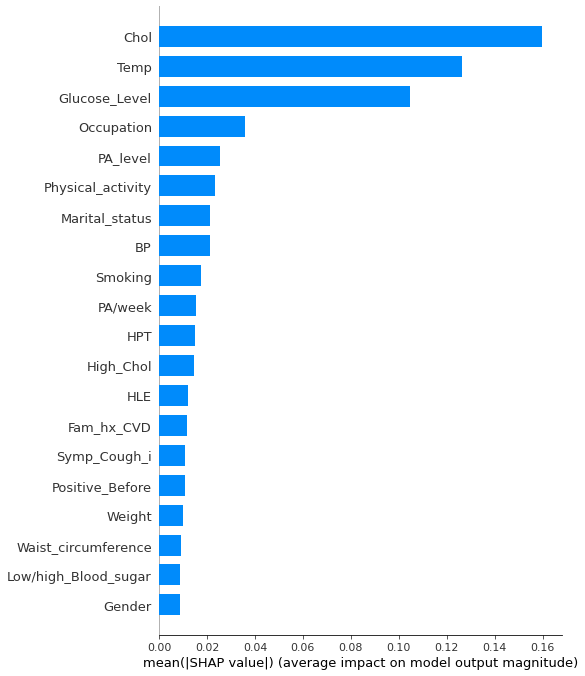

In [ ]:
shap.summary_plot(shap_values, plot_type = 'bar', feature_names = Xtest.columns)

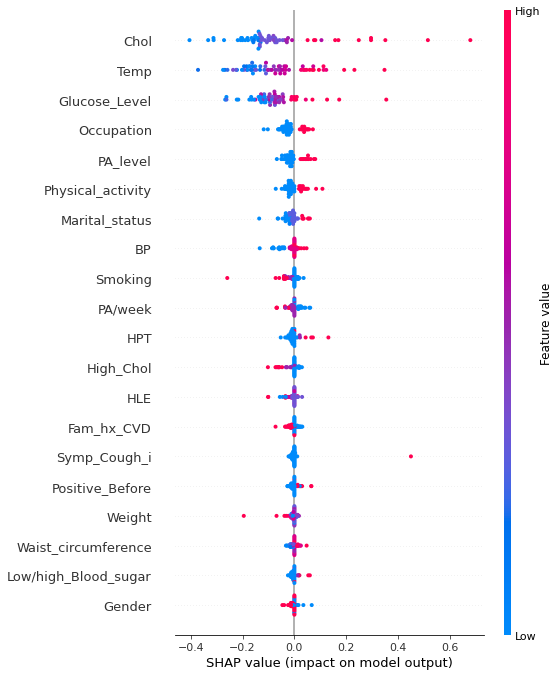

In [ ]:
shap.summary_plot(shap_values, Xtest)


In [ ]:
full_boost=xgb.XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
full_boost.fit(Xtrain, Ytrain)
y_pred=full_boost.predict(Xtest)
print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

The accuracy is 86.15 %


In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-3/models/non_corr/xgb/XGB_Correlation_with_Cross-Validation_with_SMOTE.sav' 
pickle.dump(full_boost, open(filename, 'wb')) 


In [ ]:
loadedmodel = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-3/models/non_corr/xgb/XGB_Correlation_with_Cross-Validation_with_SMOTE.sav', 'rb'))
y_pred = loadedmodel.predict(Xtest)
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(Ytest, y_pred)
auc_xgb = round(metrics.roc_auc_score(Ytest, y_pred), 4)


In [ ]:
y_pred=np.round(loadedmodel.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.91      0.93      0.92        54
           1       0.60      0.55      0.57        11

    accuracy                           0.86        65
   macro avg       0.75      0.74      0.74        65
weighted avg       0.86      0.86      0.86        65



In [ ]:
XGBoost_Multivariate_imputed_Non_PCA_Non_Cross_AUC=metrics.roc_auc_score(Ytest, y_pred)

In [ ]:
auc_xgb

0.7357

In [ ]:
print('The geometric mean is: {}'.format(geometric_mean_score(Ytest, y_pred)))
print('The Matthews correlation coefficient is: {}'.format(matthews_corrcoef(Ytest, y_pred)))

The geometric mean is: 0.7106690545187014
The Matthews correlation coefficient is: 0.4898729556760461


In [ ]:
explainer = shap.TreeExplainer(loadedmodel,Xtrain)
shap_values = explainer(Xtest)


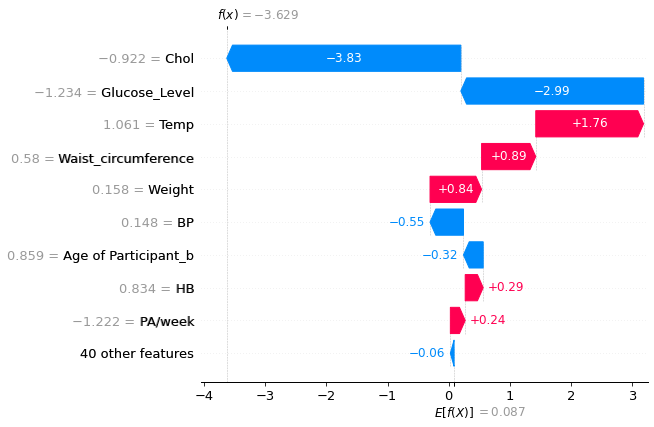

In [ ]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

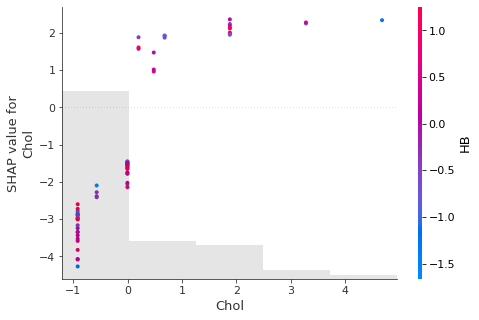

In [ ]:
shap.plots.scatter(shap_values[:,"Chol"], color=shap_values)


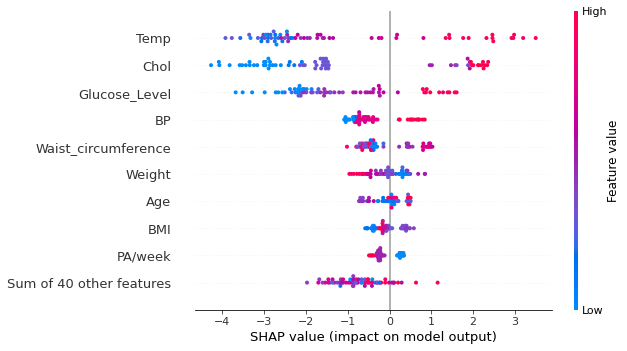

In [ ]:
shap.plots.beeswarm(shap_values)


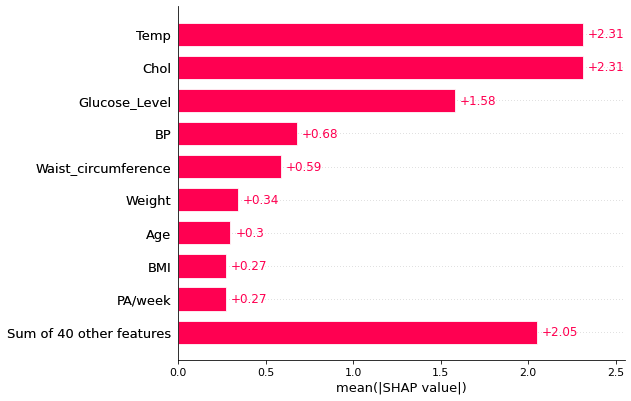

In [ ]:
shap.plots.bar(shap_values)


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


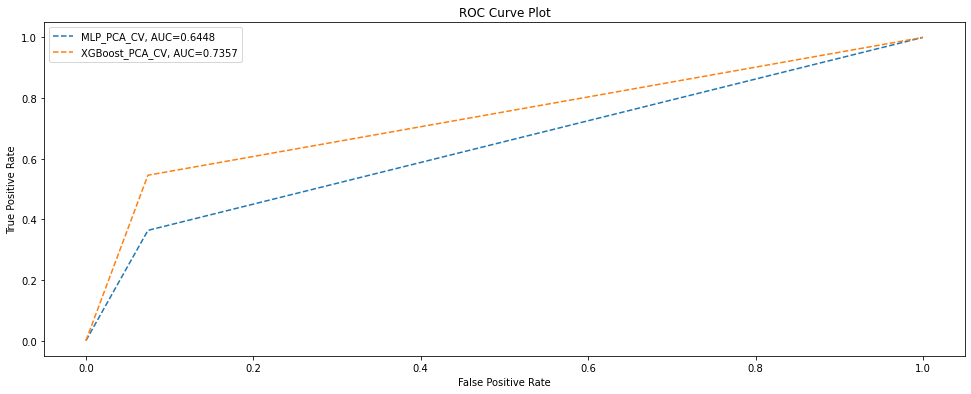

In [ ]:
plt.gcf().set_size_inches(16.5, 13.5)
plt.subplot(211)
plt.plot(fpr_mlp,tpr_mlp,linestyle='--',label="MLP_PCA_CV, AUC="+str(auc_mlp))
plt.subplot(211)
plt.plot(fpr_xgb,tpr_xgb,linestyle='--',label="XGBoost_PCA_CV, AUC="+str(auc_xgb))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve Plot")
plt.legend()